In [1]:
!pip install torch torchvision torchaudio
!pip install diffusers
!pip install transformers
!pip install pillow  # For working with images via PIL
!pip install matplotlib  # For image display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.6 MB/s eta 0:00:0000:0100:01


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import random

class BriefPromptGenerator:
    def __init__(self, model_name: str = "gpt2"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForCausalLM.from_pretrained(model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

        # Minimal but effective atmospheric enhancers
        self.time_states = ["at dawn", "at dusk", "under starlight", "in daylight"]

    def craft_prompt_template(self, inputs: dict) -> str:
        """Create a concise prompt template"""
        time_state = random.choice(self.time_states)

        template = f"""Create a brief image description (max 70 words):

{inputs['subject']} {inputs['environment']} {time_state}. {inputs['mood']} atmosphere
surrounds the scene as {inputs['details']}. {inputs['action']}. Render {inputs['style']}."""

        return template

    def generate_prompt(self, inputs: dict) -> str:
        # Create template
        template = self.craft_prompt_template(inputs)

        # Tokenize
        input_ids = self.tokenizer.encode(template, return_tensors="pt").to(self.device)

        # Generate with parameters optimized for brevity
        with torch.no_grad():
            outputs = self.model.generate(
                input_ids,
                max_length=150,  # Shorter max length
                min_length=50,   # Shorter min length
                num_return_sequences=1,
                temperature=0.7,  # Lower temperature for more focused output
                top_k=40,
                top_p=0.9,
                repetition_penalty=1.2,
                no_repeat_ngram_size=2,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id
            )

        # Decode and format
        generated_text = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return self.format_output(generated_text)

    def format_output(self, text: str) -> str:
        """Format output to ensure it's under 70 words"""
        # Remove the instruction text
        text = text.replace("Create a brief image description (max 70 words):", "").strip()
        words = text.split()

        # Truncate to 70 words if longer
        if len(words) > 70:
            words = words[:70]
            # Ensure the last sentence ends properly
            last_sentence = ' '.join(words).rstrip(',.!?') + '.'
            return last_sentence

        return ' '.join(words)

def main():
    generator = BriefPromptGenerator()

    print("Enter details for your brief image prompt:")
    inputs = {
        'subject': input("Subject (e.g., 'a crystal palace'): "),
        'environment': input("Environment (e.g., 'floating in clouds'): "),
        'mood': input("Mood (e.g., 'mysterious'): "),
        'details': input("Key details (e.g., 'light fragments through crystal walls'): "),
        'action': input("Action (e.g., 'ethereal beings glide through halls'): "),
        'style': input("Art style (e.g., 'in dreamlike watercolor'): ")
    }

    print("\nGenerating brief prompt...\n")
    generated_prompt = generator.generate_prompt(inputs)

    print("=" * 80)
    print("Generated Prompt:")
    print("=" * 80)
    print(generated_prompt)
    print("\nWord count:", len(generated_prompt.split()))
    print("=" * 80)

if __name__ == "__main__":
    main()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Enter details for your brief image prompt:


Subject (e.g., 'a crystal palace'):  a haunted palace
Environment (e.g., 'floating in clouds'):  located in a dense forest
Mood (e.g., 'mysterious'):  eerie
Key details (e.g., 'light fragments through crystal walls'):  among dark dense forest
Action (e.g., 'ethereal beings glide through halls'):  the haunted palace gives eerie vibes
Art style (e.g., 'in dreamlike watercolor'):  realistic


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



Generating brief prompt...

Generated Prompt:
a haunted palace located in a dense forest in daylight. eerie atmosphere surrounds the scene as among dark dense forest. the haunted palace gives eerie vibes. Render realistic. If you have trouble with this, try using Photoshop's TIFF file instead of your normal .TXT format to create more detailed images and better look at it on an iPad or iPhone! : An overview : The haunting castle is very different.

Word count: 70


Enter a description for the image:  a haunted palace located in a dense forest in daylight. eerie atmosphere surrounds the scene as among dark dense forest. the haunted palace gives eerie vibes. Render realistic


Generating image... please wait.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

  0%|          | 0/150 [00:00<?, ?it/s]

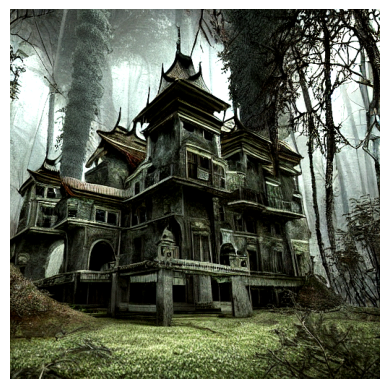

Are you satisfied with the image? (yes/no):  no



Let's enhance the image!
Guidance Scale: Higher values produce images that better match your prompt but may lose some creativity.


How much would you like to increase the guidance scale? (e.g., 1.0):  5


Inference Steps: More steps typically lead to finer details and higher quality.


How much would you like to increase the inference steps? (e.g., 50):  50


Trying again with enhanced parameters (guidance scale: 14.0, steps: 200)...


  0%|          | 0/200 [00:00<?, ?it/s]

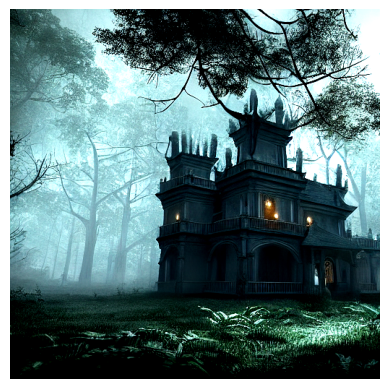

Are you satisfied with the image? (yes/no):  no



Let's enhance the image!
Guidance Scale: Higher values produce images that better match your prompt but may lose some creativity.


How much would you like to increase the guidance scale? (e.g., 1.0):  10


Inference Steps: More steps typically lead to finer details and higher quality.


How much would you like to increase the inference steps? (e.g., 50):  100


Trying again with enhanced parameters (guidance scale: 24.0, steps: 300)...


  0%|          | 0/300 [00:00<?, ?it/s]

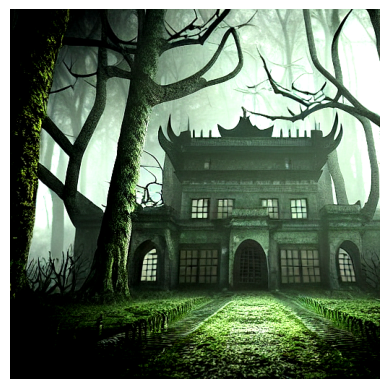

Are you satisfied with the image? (yes/no):  no



Let's enhance the image!
Guidance Scale: Higher values produce images that better match your prompt but may lose some creativity.


How much would you like to increase the guidance scale? (e.g., 1.0):  5


Inference Steps: More steps typically lead to finer details and higher quality.


How much would you like to increase the inference steps? (e.g., 50):  50


Trying again with enhanced parameters (guidance scale: 29.0, steps: 350)...


  0%|          | 0/350 [00:00<?, ?it/s]

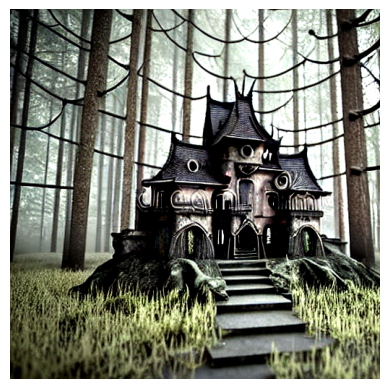

Are you satisfied with the image? (yes/no):  no



Let's enhance the image!
Guidance Scale: Higher values produce images that better match your prompt but may lose some creativity.


How much would you like to increase the guidance scale? (e.g., 1.0):  2


Inference Steps: More steps typically lead to finer details and higher quality.


How much would you like to increase the inference steps? (e.g., 50):  20


Trying again with enhanced parameters (guidance scale: 31.0, steps: 370)...


  0%|          | 0/370 [00:00<?, ?it/s]

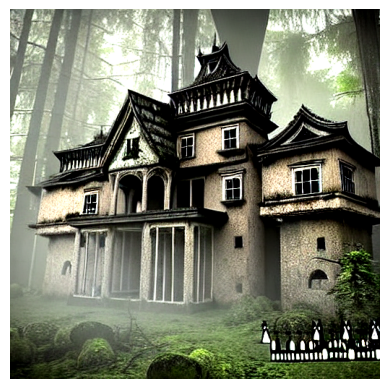

Are you satisfied with the image? (yes/no):  yes


Glad you are satisfied with the image!


In [3]:
import torch
from PIL import Image, ImageEnhance
from transformers import CLIPProcessor, CLIPModel
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import random

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion and CLIP models from Hugging Face
def load_models():
    sd_model = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5", 
        torch_dtype=torch.float16  # Use FP16 for better performance
    ).to(device)
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    return sd_model, clip_model, clip_processor

# Dynamically augment the prompt for richer outputs
def augment_prompt(prompt):
    extra_descriptors = ["high quality", "4k", "ultra-detailed", "cinematic lighting", "sharp focus", "vivid colors"]
    augmented_prompt = f"{prompt}, {random.choice(extra_descriptors)}"
    return augmented_prompt

# Generate an image using the text prompt with advanced fine-tuning
def generate_image(prompt, sd_model, guidance_scale=9.0, num_inference_steps=150):
    augmented_prompt = augment_prompt(prompt)  # Add extra descriptors to prompt
    with torch.no_grad():
        image = sd_model(
            augmented_prompt, 
            guidance_scale=guidance_scale, 
            num_inference_steps=num_inference_steps
        ).images[0]
    return image

# Post-process the image for better visual quality
def enhance_image(image):
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.5)  # Boost contrast
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(1.5)  # Boost sharpness
    return image

# Ask if the user is satisfied and retry with improved settings if not
def ask_for_feedback(sd_model, prompt, initial_guidance=9.0, initial_steps=150):
    guidance_scale = initial_guidance
    num_inference_steps = initial_steps

    while True:
        # Generate and enhance the image
        generated_image = generate_image(prompt, sd_model, guidance_scale, num_inference_steps)
        enhanced_image = enhance_image(generated_image)

        # Display the enhanced image
        plt.imshow(enhanced_image)
        plt.axis("off")  # Hide axes
        plt.show()

        # Ask the user if they are satisfied
        response = input("Are you satisfied with the image? (yes/no): ").strip().lower()

        if response == "yes":
            print("Glad you are satisfied with the image!")
            break
        elif response == "no":
            # Get user feedback for adjustments
            print("\nLet's enhance the image!")
            print("Guidance Scale: Higher values produce images that better match your prompt but may lose some creativity.")
            guidance_increment = float(input("How much would you like to increase the guidance scale? (e.g., 1.0): "))
            print("Inference Steps: More steps typically lead to finer details and higher quality.")
            steps_increment = int(input("How much would you like to increase the inference steps? (e.g., 50): "))

            # Update the parameters based on user input
            guidance_scale += guidance_increment
            num_inference_steps += steps_increment
            print(f"Trying again with enhanced parameters (guidance scale: {guidance_scale}, steps: {num_inference_steps})...")
        else:
            print("Invalid input. Please answer with 'yes' or 'no'.")

# Main function to get the prompt and generate the image
def main():
    prompt = input("Enter a description for the image: ")  # Input from user
    print("Generating image... please wait.")
    
    sd_model, clip_model, clip_processor = load_models()
    
    # Call ask_for_feedback to handle user feedback and automatic improvement
    ask_for_feedback(sd_model, prompt)

if __name__ == "__main__":
    main()